# Coursera Capstone Project
## The Battle of Neighborhoods (Week 2)

# Table of contents

1 [Introduction](#Intro) <br>
2 [Data](#Data) <br>
3 [Methodology](#Meth) <br>
4 [Results](#Res) <br>
5 [Discussion](#Disc)<br>
6 [Conclusion](#Conc)

# 1 Introduction <a name="Intro"></a>

##  Description of the problem and a discussion of the background:

New York is one of the cultural and financial centers of the USA. Furthermore, it is a flagship for the "American Way of Life", which is visited by millions of people every year. For this reason, New York is of crucial importance for tourism and for the worldwide reputation of the USA.

In the year 2018 New York City welcomed a new record of over 65 million visitors. According to analysis company Smith Travel Research the hotel occupancy rate of New York City rose to 87.3 percent, which was more than comparable cities like Paris and Berlin (both around 75 percent).

Currently there are over 115,530 hotel rooms in over 630 hotels in the five boroughs of New York City. Most of these rooms, around 80 percent, are in Manhattan. Since 2010, the New York City hotel market had a 42 percent growth in new hotel rooms. Most of this growth  has  happened  in  areas  outside  of  Manhattan,  recently  creating  well-established  hotel  districts  in  areas  of Brooklyn and Queens.

In this environment I am the Business Analyst of a hotel company looking for a location for a new hotel in New York City.

## Business Problem:

As seen in the problem description, New York City continues to be a worthwhile environment to build and operate a new Hotel. Since most hotels are in Manhattan and the costs for a new building there are very high, the goal is to analyze the possibilities for a hotel in Brooklyn. Legal problems and non-available construction site do not play a role at this point of the planning yet.

For tourists and businesspeople there are a number of requirements for a hotel. The following demands will be the most important drivers for a successful  hotel:

- Proximity to Manhattan 
- Access to public transportation
- Presence of services and amenities like restaurants and cultural sights in neighborhood
- Significant office or commercial markets
- Existing number of hotels in neighborhood


Furthermore, the Real Estate prices continue to play an important role for the success of a new hotel and will be part of the analysis.

Ultimately, the Business Problem is in which neighborhood a new hotel would have the greatest success. ALso what neighborhood is the worst for a new hotel and what category would be the best? Therefore, we will look at the demands for a successful hotel and analyze which neighborhood offers the best prerequisites for a new hotel. Interested Audience would be Hotel Operators and Investors but also other businesses that benefit/depend from hotels and want to plan for the future.

# 2 Data <a name="Data"></a>

## Description of the Data:

The following information is required to answer the issues of the problem:
- List of neighborhoods of Brooklyn with their geodata (latitud and longitud) 
- List real estate prices for each neighborhood of Brooklyn
- Proximity to the Center of Manhattan for each neighborhood of Brooklyn
- Venues like restaurants and cultural sights for each neighborhood of Brooklyn

Therefore we need the follwing data:

- New York City data that contains list Boroughs, Neighborhoods along with their latitude and longitude.
    - Data source : https://cocl.us/new_york_dataset
- Restaurants, hotels, Subway stations and cultural sights.
    - Data source : Fousquare API
- GeoSpace data to get the New york Borough boundaries that will help us visualize choropleth map.
    - https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm
- New York Real Estate Prices by neighborhood.
    - https://streeteasy.com/blog/q1-2019-market-reports/


## How the data will be used to solve the problem 

The approach will be as follows:

- Collect the new york city data from https://cocl.us/new_york_dataset
- Use Foursquare and geopy data to find and map venues for all Brooklyn neighborhoods and clustered in groups
- Filter out all venues that are important for tourists and businesspeople
- create a map that shows the average rental price for all Brooklyn neighborhoods
- Cluster neighborhoods by venues
- Rank the Brooklyn neighborhoods by best usage for a new hotel

The data will allow to answer the key questions to make a decision:

- What is the cost for each Brooklyn neighborhood?
- Which Brooklyn neighborhood has restaurants and cultural sights?
- Are there tradeoffs between Proximity to the center of Manhattan and price and location?

-

-

## Create Database

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

#### Download new_york_dataset Dataset

In [166]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [167]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
neighborhoods_data = newyork_data['features']

# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


# 3 Methodology <a name="Meth"></a>

This section represents the main component of the report where the data is gathered, prepared for analysis. The tools described are used here and the Notebook cells indicates the execution of steps.

In [331]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [332]:
# show number of neigborhoods in ech borough
hoods=neighborhoods['Borough'].unique()
for i in hoods:
    neighborhoods_z = neighborhoods[neighborhoods['Borough'] == i]
    print('The borough {} has {} neighborhoods.'.format(i,
        neighborhoods_z.shape[0]))
    


The borough Bronx has 52 neighborhoods.
The borough Manhattan has 40 neighborhoods.
The borough Brooklyn has 70 neighborhoods.
The borough Queens has 81 neighborhoods.
The borough Staten Island has 63 neighborhoods.


In [170]:
address = 'New York City, Brooklyn, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City (Brooklyn) are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City (Brooklyn) are 40.6391069, -73.9385536.


### Overview of all neighborhoods of New York

In [7]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)


# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

### Calculate Distance from Center (Manhattan) for each neighborhood

In [172]:
# Define Center --> An analysis of tripadvisor shows that the Empire State building 
# is the most important and most visited building in Manhattan and be the center of Manhattan in our Example.
address_center = 'Empire State Building, New York, NY'
geolocator = Nominatim(user_agent="ny_explorer")
location_center = geolocator.geocode(address_center)
latitude_center = location_center.latitude
longitude_center = location_center.longitude
print('Center of Manhattan (Empire State Building) is at {}, {}.'.format(latitude_center, longitude_center))


#pip install geopy
from geopy.distance import geodesic
mh_center = (latitude_center, longitude_center)

Center of Manhattan (Empire State Building) is at 40.7484284, -73.9856546198733.


In [335]:
for index, row in neighborhoods.iterrows(): 
    coordinates = (row['Latitude'], row['Longitude'])
    dist = geodesic(mh_center, coordinates).km
    neighborhoods.loc[index, 'Center_Distance'] = dist
    
neighborhoods.tail(7)

,Borough,Neighborhood,Latitude,Longitude,Center_Distance
299,Bronx,Kingsbridge Heights,40.870392,-73.901523,15.291712
300,Brooklyn,Erasmus,40.646926,-73.948177,11.708251
301,Manhattan,Hudson Yards,40.756658,-74.000111,1.525027
302,Queens,Hammels,40.587338,-73.805530,23.494204
303,Queens,Bayswater,40.611322,-73.765968,24.015631
304,Queens,Queensbridge,40.756091,-73.945631,3.485471
305,Staten Island,Fox Hills,40.617311,-74.081740,16.672802


In [10]:
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

from folium import plugins

grouping = plugins.MarkerCluster().add_to(map_newyork)

#neighborhoods_Brooklyn = neighborhoods[neighborhoods['Borough'] == "Brooklyn"]

# add markers to map
for lat, lng, borough, neighborhood, Center_Distance in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood'], neighborhoods['Center_Distance']):
    label = '{}, {}, {}'.format(neighborhood, borough, Center_Distance)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(grouping)  
    
    
map_newyork

<div class="alert alert-block alert-warning">
<b>New DF:</b> Creating new Dataframe Brooklyn_data
</div>

In [336]:
# Creating new Dataframe Brooklyn_data
brooklyn_data = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
brooklyn_data.sort_values(by=['Center_Distance'], ascending=False).head()

,Borough,Neighborhood,Latitude,Longitude,Center_Distance
32,Brooklyn,Coney Island,40.574293,-73.988683,19.339022
31,Brooklyn,Manhattan Beach,40.577914,-73.943537,19.267269
39,Brooklyn,Sea Gate,40.576375,-74.007873,19.198199
5,Brooklyn,Brighton Beach,40.576825,-73.965094,19.135252
6,Brooklyn,Sheepshead Bay,40.586890,-73.943186,18.294312


### Analysis of the Brooklyn Data

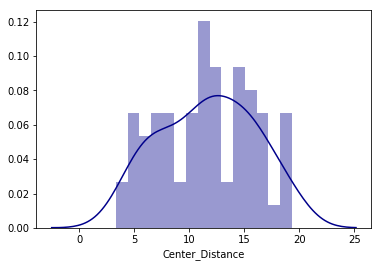

In [338]:
# Distance to Center Histogram

import seaborn as sns
sns.distplot(brooklyn_data['Center_Distance'], hist=True, kde=True, bins=15, color = 'darkblue')

In [349]:
# Descriptive Statistics of Center_Distance:
df_rents['Center_Distance'].describe()

count    48.000000
mean     11.521195
std       4.631740
min       3.337298
25%       7.574486
50%      11.723215
75%      15.147785
max      19.339022
Name: Center_Distance, dtype: float64

In [339]:
# The code was removed by Watson Studio for sharing.

,Borough,Neighborhood,Latitude,Longitude,Center_Distance,Median Recorded Sales Price
0,Brooklyn,Bay Ridge,40.625801,-74.030621,14.138050,615000.0
1,Brooklyn,Bensonhurst,40.611009,-73.995180,15.281355,1140000.0
2,Brooklyn,Sunset Park,40.645103,-74.010316,11.661878,1100000.0
3,Brooklyn,Greenpoint,40.730201,-73.954241,3.337298,1609143.0
4,Brooklyn,Gravesend,40.595260,-73.973471,17.040144,830000.0


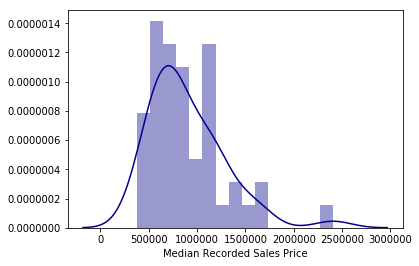

In [340]:
# Median Recorded Sales Price in $ Histogram
sns.distplot(df_rents['Median Recorded Sales Price'], hist=True, kde=True, bins=15, color = 'darkblue')

In [348]:
#Descriptive Statistics of Sales Prices:
df_rents['Median Recorded Sales Price'].describe()

count    4.700000e+01
mean     8.985091e+05
std      3.910539e+05
min      3.800000e+05
25%      6.150000e+05
50%      8.000000e+05
75%      1.129240e+06
max      2.406250e+06
Name: Median Recorded Sales Price, dtype: float64

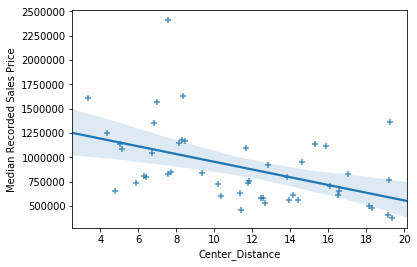

In [341]:
# Correlation between the Sales Price and the Distance to the Center:
ax = sns.regplot(x=df_rents['Center_Distance'], y=df_rents['Median Recorded Sales Price'], marker="+")


### Venues in each neighborhood

In [177]:
CLIENT_ID = '3EMOOU1NUFMFSHDGSSXCTI0JHVMHNW1LVMSBS3M3YINHKA3Z' # your Foursquare ID
CLIENT_SECRET = 'CWWNP4F44UDJRYDTRJSCCKGRYQYD1XDAP13HNTJXCJ0ZVAJK' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 20
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3EMOOU1NUFMFSHDGSSXCTI0JHVMHNW1LVMSBS3M3YINHKA3Z
CLIENT_SECRET:CWWNP4F44UDJRYDTRJSCCKGRYQYD1XDAP13HNTJXCJ0ZVAJK


<div class="alert alert-block alert-info">
<b>Test:</b> function to repeat the process to all the neighborhoods in Toronto
</div>

In [178]:
def getNearbyVenues(names, latitudes,longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names,latitudes,longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [179]:
brooklyn_venues = getNearbyVenues(names=brooklyn_data['Neighborhood'],
                                   latitudes=brooklyn_data['Latitude'],
                                   longitudes=brooklyn_data['Longitude'],)

Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Ditmas Park
Wingate
Rugby
Remsen Village
New Lots
Paerdegat Basin
Mill Basin
Fulton Ferry
Vinegar Hill
Weeksville
Broadway Junction
Dumbo
Homecrest
Highland Park
Madison
Erasmus


In [180]:
print(brooklyn_venues.shape)
brooklyn_venues.head()

(1227, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,Pilo Arts Day Spa and Salon,40.624748,-74.030591,Spa
1,Bay Ridge,40.625801,-74.030621,Bagel Boy,40.627896,-74.029335,Bagel Shop
2,Bay Ridge,40.625801,-74.030621,Cocoa Grinder,40.623967,-74.030863,Juice Bar
3,Bay Ridge,40.625801,-74.030621,Pegasus Cafe,40.623168,-74.031186,Breakfast Spot
4,Bay Ridge,40.625801,-74.030621,Ho' Brah Taco Joint,40.622960,-74.031371,Taco Place


#### Wordcloud for the Venue Categories

In [ ]:


from os import path
from PIL import Image
!conda install -c conda-forge wordcloud --yes 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

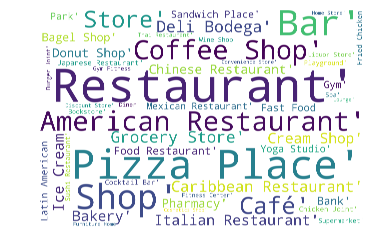

In [342]:
text = brooklyn_venues['Venue Category'].tolist()

wordcloud = WordCloud(
        background_color='white',
        max_words=50,
        #max_font_size=40, 
        scale=4,
        width = 3000,
        height = 2000,
        random_state=1).generate(str(text))

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Prepare for cluster analysis

In [181]:
brooklyn_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bath Beach,20,20,20,20,20,20
Bay Ridge,20,20,20,20,20,20
Bedford Stuyvesant,20,20,20,20,20,20
Bensonhurst,20,20,20,20,20,20
Bergen Beach,6,6,6,6,6,6
Boerum Hill,20,20,20,20,20,20
Borough Park,20,20,20,20,20,20
Brighton Beach,20,20,20,20,20,20
Broadway Junction,14,14,14,14,14,14


In [182]:
# Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(brooklyn_venues['Venue Category'].unique())))

There are 221 uniques categories.


In [183]:
# one hot encoding
brooklyn_onehot = pd.get_dummies(brooklyn_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
brooklyn_onehot['Neighborhood'] = brooklyn_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [brooklyn_onehot.columns[-1]] + list(brooklyn_onehot.columns[:-1])
brooklyn_onehot = brooklyn_onehot[fixed_columns]

# set index
brooklyn_grouped = brooklyn_onehot.groupby('Neighborhood').mean().reset_index()

In [184]:
# Let's print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in brooklyn_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = brooklyn_grouped[brooklyn_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
    break

----Bath Beach----
                venue  freq
0  Italian Restaurant  0.10
1     Bubble Tea Shop  0.10
2          Restaurant  0.05
3        Dessert Shop  0.05
4   German Restaurant  0.05




In [185]:
# Make a pandas dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]



# create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = brooklyn_grouped['Neighborhood']

for ind in np.arange(brooklyn_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(brooklyn_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted



,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bath Beach,Italian Restaurant,Bubble Tea Shop,Ice Cream Shop,Sushi Restaurant,German Restaurant,Park,Dessert Shop,Pizza Place,Rental Car Location,Restaurant
1,Bay Ridge,Spa,Italian Restaurant,Grocery Store,Ice Cream Shop,Juice Bar,Lounge,Coffee Shop,Bookstore,Greek Restaurant,Bar
2,Bedford Stuyvesant,Pizza Place,Bar,Coffee Shop,Café,BBQ Joint,Boutique,Gourmet Shop,New American Restaurant,Juice Bar,Thrift / Vintage Store
3,Bensonhurst,Ice Cream Shop,Sushi Restaurant,Bagel Shop,Moving Target,Shabu-Shabu Restaurant,Chinese Restaurant,Liquor Store,Russian Restaurant,Noodle House,Cosmetics Shop
4,Bergen Beach,Harbor / Marina,Baseball Field,Playground,Donut Shop,Athletics & Sports,Flower Shop,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market
5,Boerum Hill,Coffee Shop,Spa,Yoga Studio,Sushi Restaurant,Italian Restaurant,Japanese Restaurant,Gym / Fitness Center,Kids Store,Martial Arts Dojo,Furniture / Home Store
6,Borough Park,Bank,Pizza Place,Pharmacy,Deli / Bodega,Fast Food Restaurant,Kosher Restaurant,Restaurant,Metro Station,Bistro,Coffee Shop
7,Brighton Beach,Restaurant,Diner,Gourmet Shop,Mediterranean Restaurant,Dessert Shop,Bookstore,Sushi Restaurant,Taco Place,Non-Profit,Beach
8,Broadway Junction,Diner,Fried Chicken Joint,Donut Shop,Ice Cream Shop,Construction & Landscaping,Caribbean Restaurant,Seafood Restaurant,Sandwich Place,Burger Joint,Hotel
9,Brooklyn Heights,Yoga Studio,Coffee Shop,Pet Store,Thai Restaurant,Asian Restaurant,Deli / Bodega,Diner,Gym,Gym / Fitness Center,History Museum


In [196]:
# Analysis of the number of clusters
brooklyn_grouped_clustering = brooklyn_grouped.drop('Neighborhood', 1)

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster2 in range(2, 7):
    kmeans2 = KMeans(n_clusters = n_cluster2, random_state = 0).fit(brooklyn_grouped_clustering)
    label2 = kmeans2.labels_
    sil_coeff = silhouette_score(brooklyn_grouped_clustering, label2, metric = 'euclidean')
    print("Where n_clusters = {}, the Silhouette Coefficient is {}".format(n_cluster2, sil_coeff))



Where n_clusters = 2, the Silhouette Coefficient is 0.3259505503667884
Where n_clusters = 3, the Silhouette Coefficient is 0.0475885365969299
Where n_clusters = 4, the Silhouette Coefficient is 0.048178679169017684
Where n_clusters = 5, the Silhouette Coefficient is 0.05286920128114534
Where n_clusters = 6, the Silhouette Coefficient is 0.011267024698124992


### Cluster Analysis

In [187]:
# Run k-means to cluster the neighborhood into 5 clusters.
# set number of clusters
kclusters = 5

brooklyn_grouped_clustering = brooklyn_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(brooklyn_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 



array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int32)

In [359]:
# Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood
brooklyn_merged = brooklyn_data

# add clustering labels
brooklyn_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
brooklyn_merged = brooklyn_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

brooklyn_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Center_Distance,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brooklyn,Bay Ridge,40.625801,-74.030621,14.138050,0,Spa,Italian Restaurant,Grocery Store,Ice Cream Shop,Juice Bar,Lounge,Coffee Shop,Bookstore,Greek Restaurant,Bar
1,Brooklyn,Bensonhurst,40.611009,-73.995180,15.281355,0,Ice Cream Shop,Sushi Restaurant,Bagel Shop,Moving Target,Shabu-Shabu Restaurant,Chinese Restaurant,Liquor Store,Russian Restaurant,Noodle House,Cosmetics Shop
2,Brooklyn,Sunset Park,40.645103,-74.010316,11.661878,0,Pizza Place,Latin American Restaurant,Mexican Restaurant,Bank,Bakery,Gym,Record Shop,Creperie,Mobile Phone Shop,Breakfast Spot
3,Brooklyn,Greenpoint,40.730201,-73.954241,3.337298,1,Mexican Restaurant,Café,Bar,Polish Restaurant,Record Shop,Cocktail Bar,Spa,French Restaurant,Fried Chicken Joint,Furniture / Home Store
4,Brooklyn,Gravesend,40.595260,-73.973471,17.040144,0,Pizza Place,Lounge,Deli / Bodega,Bakery,Men's Store,Fish Market,Music Venue,Baseball Field,Bar,Electronics Store


In [189]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(brooklyn_merged['Latitude'], brooklyn_merged['Longitude'], brooklyn_merged['Neighborhood'], brooklyn_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7,).add_to(map_clusters)
       
map_clusters


In [362]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 0]

,Borough,Neighborhood,Latitude,Longitude,Center_Distance,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brooklyn,Bay Ridge,40.625801,-74.030621,14.138050,0,Spa,Italian Restaurant,Grocery Store,Ice Cream Shop,Juice Bar,Lounge,Coffee Shop,Bookstore,Greek Restaurant,Bar
1,Brooklyn,Bensonhurst,40.611009,-73.995180,15.281355,0,Ice Cream Shop,Sushi Restaurant,Bagel Shop,Moving Target,Shabu-Shabu Restaurant,Chinese Restaurant,Liquor Store,Russian Restaurant,Noodle House,Cosmetics Shop
2,Brooklyn,Sunset Park,40.645103,-74.010316,11.661878,0,Pizza Place,Latin American Restaurant,Mexican Restaurant,Bank,Bakery,Gym,Record Shop,Creperie,Mobile Phone Shop,Breakfast Spot
4,Brooklyn,Gravesend,40.595260,-73.973471,17.040144,0,Pizza Place,Lounge,Deli / Bodega,Bakery,Men's Store,Fish Market,Music Venue,Baseball Field,Bar,Electronics Store
5,Brooklyn,Brighton Beach,40.576825,-73.965094,19.135252,0,Restaurant,Diner,Gourmet Shop,Mediterranean Restaurant,Dessert Shop,Bookstore,Sushi Restaurant,Taco Place,Non-Profit,Beach
7,Brooklyn,Manhattan Terrace,40.614433,-73.957438,15.069926,0,Pizza Place,Donut Shop,Ice Cream Shop,Bank,Steakhouse,Mobile Phone Shop,Pharmacy,Japanese Restaurant,Jazz Club,Convenience Store
9,Brooklyn,Crown Heights,40.670829,-73.943291,9.331266,0,Pizza Place,Museum,Café,Deli / Bodega,Bakery,Playground,Coffee Shop,Salon / Barbershop,Candy Store,Supermarket
11,Brooklyn,Kensington,40.642382,-73.980421,11.784553,0,Thai Restaurant,Ice Cream Shop,Grocery Store,Lingerie Store,Liquor Store,Café,Furniture / Home Store,Outdoors & Recreation,Bakery,Bagel Shop
13,Brooklyn,Prospect Heights,40.676822,-73.964859,8.143585,0,Bar,Cocktail Bar,Café,Yoga Studio,Mexican Restaurant,Brewery,Caribbean Restaurant,Garden,Sushi Restaurant,Latin American Restaurant
15,Brooklyn,Williamsburg,40.707144,-73.958115,5.141080,0,Bar,Yoga Studio,Bagel Shop,Breakfast Spot,Lounge,Liquor Store,Steakhouse,Latin American Restaurant,Taco Place,Tapas Restaurant


In [363]:
#brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 0, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

In [364]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 1]

,Borough,Neighborhood,Latitude,Longitude,Center_Distance,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Brooklyn,Greenpoint,40.730201,-73.954241,3.337298,1,Mexican Restaurant,Café,Bar,Polish Restaurant,Record Shop,Cocktail Bar,Spa,French Restaurant,Fried Chicken Joint,Furniture / Home Store
6,Brooklyn,Sheepshead Bay,40.586890,-73.943186,18.294312,1,Dessert Shop,Turkish Restaurant,Sandwich Place,Yoga Studio,Grocery Store,Department Store,Diner,Restaurant,Russian Restaurant,Café
8,Brooklyn,Flatbush,40.636326,-73.958401,12.660100,1,Mexican Restaurant,Deli / Bodega,Coffee Shop,Caribbean Restaurant,Bank,Pharmacy,Plaza,Donut Shop,Sandwich Place,Chinese Restaurant
14,Brooklyn,Brownsville,40.663950,-73.910235,11.341436,1,Restaurant,Park,Spanish Restaurant,Burger Joint,Caribbean Restaurant,Moving Target,Convenience Store,Men's Store,Chinese Restaurant,Metro Station
18,Brooklyn,Brooklyn Heights,40.695864,-73.993782,5.877482,1,Yoga Studio,Coffee Shop,Pet Store,Thai Restaurant,Asian Restaurant,Deli / Bodega,Diner,Gym,Gym / Fitness Center,History Museum
19,Brooklyn,Cobble Hill,40.687920,-73.998561,6.807314,1,Bar,Playground,Cocktail Bar,Italian Restaurant,Spanish Restaurant,Deli / Bodega,Seafood Restaurant,Fish Market,Spa,Men's Store
23,Brooklyn,Fort Greene,40.688527,-73.972906,6.738582,1,New American Restaurant,Coffee Shop,Italian Restaurant,Cuban Restaurant,Cocktail Bar,Latin American Restaurant,Farmers Market,Bookstore,Massage Studio,Flower Shop
28,Brooklyn,Canarsie,40.635564,-73.902093,14.386518,1,Gym,Food,Asian Restaurant,Caribbean Restaurant,Event Service,Chinese Restaurant,Grocery Store,Farmers Market,Food Stand,Food Court
33,Brooklyn,Bath Beach,40.599519,-73.998752,16.573104,1,Italian Restaurant,Bubble Tea Shop,Ice Cream Shop,Sushi Restaurant,German Restaurant,Park,Dessert Shop,Pizza Place,Rental Car Location,Restaurant
36,Brooklyn,Gerritsen Beach,40.590848,-73.930102,18.118335,1,Ice Cream Shop,Bar,Harbor / Marina,Gas Station,Moving Target,Event Space,Pizza Place,Department Store,Convenience Store,Seafood Restaurant


In [365]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 2]

,Borough,Neighborhood,Latitude,Longitude,Center_Distance,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Brooklyn,East Flatbush,40.641718,-73.936103,12.568366,2,Food & Drink Shop,Moving Target,Fast Food Restaurant,Caribbean Restaurant,Park,Chinese Restaurant,Pharmacy,Supermarket,Hardware Store,Print Shop
12,Brooklyn,Windsor Terrace,40.656946,-73.980073,10.169915,2,Café,Deli / Bodega,Bagel Shop,Butcher,Chinese Restaurant,Coffee Shop,Bookstore,Sushi Restaurant,Beer Store,Thrift / Vintage Store
17,Brooklyn,Bedford Stuyvesant,40.687232,-73.941785,7.740964,2,Pizza Place,Bar,Coffee Shop,Café,BBQ Joint,Boutique,Gourmet Shop,New American Restaurant,Juice Bar,Thrift / Vintage Store
24,Brooklyn,Park Slope,40.672321,-73.977050,8.482869,2,Bagel Shop,Furniture / Home Store,Japanese Restaurant,Ice Cream Shop,Sporting Goods Shop,Bookstore,Burger Joint,Coffee Shop,Cosmetics Shop,Dessert Shop
25,Brooklyn,Cypress Hills,40.682391,-73.876616,11.775545,2,Fried Chicken Joint,Latin American Restaurant,Pizza Place,Donut Shop,Fast Food Restaurant,Ice Cream Shop,Discount Store,Bank,Supermarket,Gas Station
27,Brooklyn,Starrett City,40.647589,-73.879370,14.355821,2,Gym Pool,Liquor Store,American Restaurant,Pharmacy,Pizza Place,Caribbean Restaurant,Supermarket,Cosmetics Shop,Donut Shop,Shopping Mall
29,Brooklyn,Flatlands,40.630446,-73.929113,13.946218,2,Pharmacy,Fast Food Restaurant,Caribbean Restaurant,Fried Chicken Joint,Park,Nightclub,Lounge,Bar,Electronics Store,Paper / Office Supplies Store
52,Brooklyn,Ocean Parkway,40.613060,-73.968367,15.103261,2,Sushi Restaurant,Restaurant,Pizza Place,Bagel Shop,Bus Station,Steakhouse,Liquor Store,Sake Bar,Gift Shop,Donut Shop
56,Brooklyn,Rugby,40.655572,-73.926882,11.445454,2,Bank,Caribbean Restaurant,Ice Cream Shop,Pharmacy,Coffee Shop,Chinese Restaurant,Sandwich Place,Seafood Restaurant,Fast Food Restaurant,Mobile Phone Shop
58,Brooklyn,New Lots,40.662744,-73.885118,12.756259,2,Pizza Place,Pharmacy,Metro Station,Park,Fast Food Restaurant,Chinese Restaurant,Grocery Store,Breakfast Spot,Bank,Bakery


In [366]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 3]

,Borough,Neighborhood,Latitude,Longitude,Center_Distance,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
60,Brooklyn,Mill Basin,40.615974,-73.915154,15.870363,3,Pizza Place,Japanese Restaurant,Bagel Shop,Ice Cream Shop,Bank,Pharmacy,Pet Store,Peruvian Restaurant,Deli / Bodega,Chinese Restaurant


In [367]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 4]

,Borough,Neighborhood,Latitude,Longitude,Center_Distance,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
47,Brooklyn,Prospect Park South,40.647009,-73.962613,11.4296,4,Caribbean Restaurant,Grocery Store,Latin American Restaurant,Sporting Goods Shop,Food Truck,Mexican Restaurant,Pizza Place,Clothing Store,Bar,Electronics Store


In [386]:
# Number of Clusters
brooklyn_merged.groupby(['Cluster Labels']).agg(['count'])

,Borough,Neighborhood,Latitude,Longitude,Center_Distance,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count
Cluster Labels,,,,,,,,,,,,,,,
0,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
1,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
2,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Most common Clusters are Cluster 0 and Cluster 1. Number 3 and 4 are only one time available.

# 4 Results<a name="Res"></a>

Cluster 0 is the tourist Cluster. We have Museums, a lot of bars and a lot of different restaurants. Cluster 1 is the living Place. There are a lot of everyday locations like Cafes and Sport Studios. Cluster 2 is the Commercial Area with Pharmacies, Shops and Stores. Cluster 3 is a restaurant cluster and Cluster 4 is a shopping Cluster.

In [398]:
brooklyn_short = brooklyn_merged[['Neighborhood', 'Cluster Labels']]
df_final = pd.merge(brooklyn_short, df_rents,how='inner', on='Neighborhood')
df_final.head()

,Neighborhood,Cluster Labels,Borough,Latitude,Longitude,Center_Distance,Median Recorded Sales Price
0,Bay Ridge,0,Brooklyn,40.625801,-74.030621,14.138050,615000.0
1,Bensonhurst,0,Brooklyn,40.611009,-73.995180,15.281355,1140000.0
2,Sunset Park,0,Brooklyn,40.645103,-74.010316,11.661878,1100000.0
3,Greenpoint,1,Brooklyn,40.730201,-73.954241,3.337298,1609143.0
4,Gravesend,0,Brooklyn,40.595260,-73.973471,17.040144,830000.0


So we are looking for a Neighborhood in Cluster 1 with a short distance to the center and a low Sales Price.

In [399]:
# keep only Cluster 1
df_final = df_final[df_final['Cluster Labels']==1]
df_final.head()

,Neighborhood,Cluster Labels,Borough,Latitude,Longitude,Center_Distance,Median Recorded Sales Price
3,Greenpoint,1,Brooklyn,40.730201,-73.954241,3.337298,1609143.0
6,Sheepshead Bay,1,Brooklyn,40.586890,-73.943186,18.294312,476580.0
7,Flatbush,1,Brooklyn,40.636326,-73.958401,12.660100,530000.0
13,Brownsville,1,Brooklyn,40.663950,-73.910235,11.341436,631750.0
17,Brooklyn Heights,1,Brooklyn,40.695864,-73.993782,5.877482,735000.0


In [403]:
# keep only Neighborhoods with a Center Distance lower than 7 km
df_final1 = df_final[df_final['Center_Distance']<=7.0]
df_final1.head()

,Neighborhood,Cluster Labels,Borough,Latitude,Longitude,Center_Distance,Median Recorded Sales Price
3,Greenpoint,1,Brooklyn,40.730201,-73.954241,3.337298,1609143.0
17,Brooklyn Heights,1,Brooklyn,40.695864,-73.993782,5.877482,735000.0
18,Cobble Hill,1,Brooklyn,40.687920,-73.998561,6.807314,1350000.0
22,Fort Greene,1,Brooklyn,40.688527,-73.972906,6.738582,1050000.0
34,Clinton Hill,1,Brooklyn,40.693229,-73.967843,6.311790,807500.0


In [404]:
# keep only Neighborhoods with a Center Distance lower than 1000000.0 $
df_final2 = df_final1[df_final1['Median Recorded Sales Price']<=1000000.0]
df_final2.head()

,Neighborhood,Cluster Labels,Borough,Latitude,Longitude,Center_Distance,Median Recorded Sales Price
17,Brooklyn Heights,1,Brooklyn,40.695864,-73.993782,5.877482,735000.0
34,Clinton Hill,1,Brooklyn,40.693229,-73.967843,6.311790,807500.0
36,Downtown,1,Brooklyn,40.690844,-73.983463,6.397338,800000.0
43,South Side,1,Brooklyn,40.710861,-73.958001,4.781324,660000.0


# 5 Discussion<a name="Disc"></a>

As a Data Analyst I would recommend the hotel company to build a hotel in Brooklyn Heights or in Brooklyn South because of the right Cluster Category for tourists the Distance to the Center and the comparable low sales prices.
Because of the Limitation of the Data, the analysis is only incomplete. Further research would be necessary to get a bigger picture of the hotel market in Brooklyn and in overall New York.


-

-

-

# 6 Conclusion<a name="Conc"></a>

Even though Data was limited we found two great neighborhoods for a potential hotel. 
Clear evidence were found, that the prices increase with a lower distance to the Center of Manhattan.
All in all the Capstone Project was interesting and fun to play with the data. 


------------------------------------------------------------